### Read Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('House_price/GiaChungCu_HCM_June2021_laydulieu_com.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31950 entries, 0 to 31949
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GIỐNG - LOẠI        31950 non-null  object 
 1   GIỐNG - NHU CẦU     31950 non-null  object 
 2   GIỐNG - TỈNH THÀNH  31950 non-null  object 
 3   QUẬN HUYỆN          31950 non-null  object 
 4   GIÁ - TRIỆU ĐỒNG    31012 non-null  float64
 5   DIỆN TÍCH - M2      30493 non-null  float64
 6   HƯỚNG               18732 non-null  object 
 7   SỐ TẦNG             0 non-null      float64
 8   SỐ PHÒNG            28401 non-null  float64
 9   SỐ TOILETS          28324 non-null  float64
 10  GIẤY TỜ PHÁP LÝ     16470 non-null  object 
dtypes: float64(5), object(6)
memory usage: 2.7+ MB


In [3]:
df.head(5)

,GIỐNG - LOẠI,GIỐNG - NHU CẦU,GIỐNG - TỈNH THÀNH,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ TẦNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ


In [4]:
df.isnull().sum()

GIỐNG - LOẠI              0
GIỐNG - NHU CẦU           0
GIỐNG - TỈNH THÀNH        0
QUẬN HUYỆN                0
GIÁ - TRIỆU ĐỒNG        938
DIỆN TÍCH - M2         1457
HƯỚNG                 13218
SỐ TẦNG               31950
SỐ PHÒNG               3549
SỐ TOILETS             3626
GIẤY TỜ PHÁP LÝ       15480
dtype: int64

In [5]:
Percentage_null = df.isnull().sum()/len(df) * 100
Percentage_null


GIỐNG - LOẠI            0.000000
GIỐNG - NHU CẦU         0.000000
GIỐNG - TỈNH THÀNH      0.000000
QUẬN HUYỆN              0.000000
GIÁ - TRIỆU ĐỒNG        2.935837
DIỆN TÍCH - M2          4.560250
HƯỚNG                  41.370892
SỐ TẦNG               100.000000
SỐ PHÒNG               11.107981
SỐ TOILETS             11.348983
GIẤY TỜ PHÁP LÝ        48.450704
dtype: float64

### Data Cleaning

In [6]:
df.rename(columns={
    'GIỐNG - LOẠI': 'Property Type',
    'GIỐNG - NHU CẦU': 'Transaction Type',
    'GIỐNG - TỈNH THÀNH': 'City',
    'QUẬN HUYỆN': 'District',
    'GIÁ - TRIỆU ĐỒNG': 'Price (Million VND)',
    'DIỆN TÍCH - M2': 'Area (m2)',
    'HƯỚNG': 'Direction',
    'SỐ TẦNG': 'Floors',
    'SỐ PHÒNG': 'Rooms',
    'SỐ TOILETS': 'Toilets',
    'GIẤY TỜ PHÁP LÝ': 'Legal Papers'
}, inplace=True)


In [7]:
df.head(5)

,Property Type,Transaction Type,City,District,Price (Million VND),Area (m2),Direction,Floors,Rooms,Toilets,Legal Papers
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ


In [8]:
df['Price (Million VND)'].describe()

count     31012.000000
mean       3867.554214
std        1777.284448
min         100.000000
25%        2883.000000
50%        3815.500000
75%        4616.000000
max      150000.000000
Name: Price (Million VND), dtype: float64

In [9]:
df['Price (Million VND)'].value_counts()

Price (Million VND)
2000.0    64
2100.0    49
2200.0    48
2300.0    43
3500.0    42
          ..
5895.0     1
6305.0     1
5669.0     1
7503.0     1
7155.0     1
Name: count, Length: 5613, dtype: int64

In [10]:
df = df[(df['Price (Million VND)'] >= 1300.0) & (df['Price (Million VND)'] < 21000.0)]


In [11]:
df['Price (Million VND)'].value_counts()

Price (Million VND)
2000.0    64
2100.0    49
2200.0    48
2300.0    43
3500.0    42
          ..
2018.0     1
5970.0     1
5832.0     1
1453.0     1
7155.0     1
Name: count, Length: 5494, dtype: int64

In [12]:
# Calculate the quantiles -- Tính Q1 và Q3
q1 = df['Price (Million VND)'].quantile(0.25) # Tính Q1
q3 = df['Price (Million VND)'].quantile(0.75) # Tính Q3

# Calculate the interquantile range
iqr = q3 - q1

# Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [13]:
upper, lower

(7199.375, 326.375)

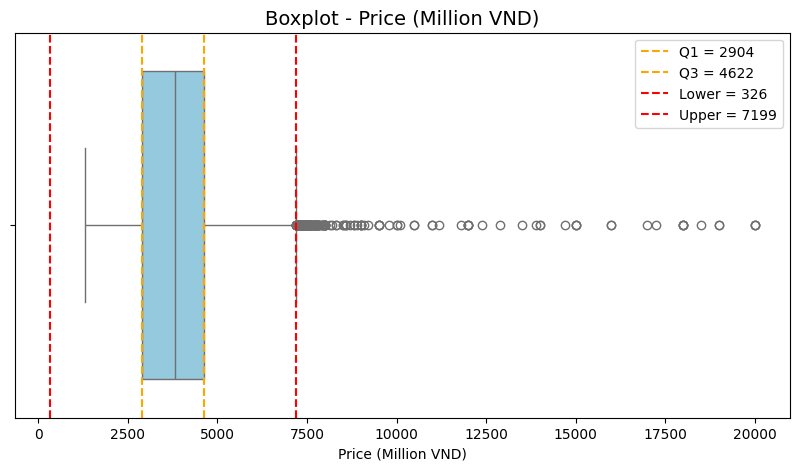

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price (Million VND)'], color='skyblue')

# Vẽ các đường tham chiếu Q1, Q3, upper, lower
plt.axvline(q1, color='orange', linestyle='--', label=f'Q1 = {q1:.0f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3 = {q3:.0f}')
plt.axvline(lower, color='red', linestyle='--', label=f'Lower = {lower:.0f}')
plt.axvline(upper, color='red', linestyle='--', label=f'Upper = {upper:.0f}')

plt.title('Boxplot - Price (Million VND)', fontsize=14)
plt.xlabel('Price (Million VND)')
plt.legend()
plt.show()


In [16]:
df['Price (Million VND)'].fillna(df['Price (Million VND)'].median(), inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_17304\2096081638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price (Million VND)'].fillna(df['Price (Million VND)'].median(), inplace=True)


In [17]:
df['Price (Million VND)'].isnull().sum()   

0

In [19]:
df['Price (Million VND)'].max(),
df['Price (Million VND)'].min()


1300.0

In [20]:
df['Area (m2)'].fillna(df['Area (m2)'].median(), inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_17304\85523567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area (m2)'].fillna(df['Area (m2)'].median(), inplace=True)


In [9]:
print("Số lượng giá trị thiếu TRƯỚC KHI xử lý:")
print(df[['Frontage', 'Access Road']].isnull().sum())

fill_with_mode = lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x

df['Frontage'] = df.groupby('Address')['Frontage'].transform(fill_with_mode)
df['Access Road'] = df.groupby('Address')['Access Road'].transform(fill_with_mode)

print("\nSố lượng giá trị thiếu SAU KHI xử lý:")
print(df[['Frontage', 'Access Road']].isnull().sum())

Số lượng giá trị thiếu TRƯỚC KHI xử lý:
Frontage       11564
Access Road    13297
dtype: int64

Số lượng giá trị thiếu SAU KHI xử lý:
Frontage       2955
Access Road    3680
dtype: int64


In [10]:
Percentage_null

Address               0.000000
Area                  0.000000
Frontage             38.254656
Access Road          43.987562
House direction      70.260346
Balcony direction    82.645804
Floors               11.919018
Bedrooms             17.076317
Bathrooms            23.401370
Legal status         14.906216
Furniture state      46.706805
Price                 0.000000
dtype: float64

In [11]:
df['House direction'].isnull().sum()

21239

In [12]:
df["Balcony direction"].isnull().sum()

24983

In [13]:
df['House direction'].fillna("Null", inplace=True)
df['Balcony direction'].fillna("Null", inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\200242105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House direction'].fillna("Null", inplace=True)
C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\200242105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [14]:
df['House direction'].isnull().sum()


0

In [15]:
df['Floors'].isnull().sum()

3603

In [16]:
df['Floors'].value_counts()


Floors
4.0     6221
3.0     6153
5.0     5717
2.0     5715
1.0     1920
6.0      780
7.0      115
8.0        3
10.0       1
9.0        1
Name: count, dtype: int64

In [17]:
df['floor'] = df.groupby('Address')['Floors'].transform(fill_with_mode)

In [18]:
df['floor'].isnull().sum()

1261

In [19]:
df['Floors'].fillna(1, inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\2613566152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Floors'].fillna(1, inplace=True)


In [20]:
df['Bathrooms'].isnull().sum()

7074

In [21]:
df['Bedrooms'].isnull().sum()


5162

In [22]:
# Loại bỏ chuyển đổi 'Area' sang dạng phân loại để giữ nguyên kiểu số
# import numpy as np
# area_bins = [0,40,70,150,np.inf]
# area_labels = ['Under 40m', '40-70m', '70-150m', 'Over 150m']
# df['Area'] = pd.cut(df['Area'], bins=area_bins, labels=area_labels)


In [23]:
df['Area']

0        84.0
1        60.0
2        90.0
3        54.0
4        92.0
         ... 
30224    67.0
30225    30.0
30226    69.4
30227    96.0
30228    35.0
Name: Area, Length: 30229, dtype: float64

In [24]:
fill_with_median = lambda x: x.fillna(x.median())

df['Bedrooms'] = df.groupby(['Address', 'Area'])['Bedrooms'].transform(fill_with_median)
df['Bedrooms'] = df.groupby(['Address'])['Bedrooms'].transform(fill_with_median)

df['Bathrooms'] = df.groupby(['Address', 'Area'])['Bathrooms'].transform(fill_with_median)
df['Bathrooms'] = df.groupby(['Address'])['Bathrooms'].transform(fill_with_median)

d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DA\DataMining\.venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\D

In [25]:
df['Bedrooms'].isnull().sum()


1454

In [26]:
df['Bedrooms'].fillna(1, inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\2199557242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedrooms'].fillna(1, inplace=True)


In [27]:
df['Bathrooms'].isnull().sum()




1845

In [28]:
df['Bathrooms'].fillna(1, inplace=True)


C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\1840766272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bathrooms'].fillna(1, inplace=True)


In [29]:
df['Legal status'].isnull().sum()

4506

In [30]:
df['Legal status'].value_counts()

Legal status
Have certificate    24774
Sale contract         949
Name: count, dtype: int64

In [31]:
df['Legal status'].fillna('Sale contract', inplace=True)


C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\1175686329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legal status'].fillna('Sale contract', inplace=True)


In [32]:
df['Furniture state'].value_counts()

Furniture state
Full     10591
Basic     5519
Name: count, dtype: int64

In [33]:
df['Furniture state'].isnull().sum()

14119

In [34]:
df['Furniture state'].fillna('Unfurnished', inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_22076\1732081185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furniture state'].fillna('Unfurnished', inplace=True)


In [35]:
df['Furniture state'].value_counts()

Furniture state
Unfurnished    14119
Full           10591
Basic           5519
Name: count, dtype: int64

In [36]:
Percentage_after_cleaning = df.isnull().sum()/len(df) * 100
Percentage_after_cleaning

Address               0.000000
Area                  0.000000
Frontage              9.775381
Access Road          12.173740
House direction       0.000000
Balcony direction     0.000000
Floors                0.000000
Bedrooms              0.000000
Bathrooms             0.000000
Legal status          0.000000
Furniture state       0.000000
Price                 0.000000
floor                 4.171491
dtype: float64

## Save Dataset

In [35]:
# saving the dataframe
df.to_csv(r'Complete_dataset/Complete_dataset_VietNam_house_pricing.csv')

## Machine Learning

## Plan : 

- LinearRegression → baseline, dễ hiểu, giải thích được.
- HistGradientBoostingRegressor (HGBR) → phiên bản tối ưu hơn GradientBoosting trong sklearn, chạy nhanh và hiệu quả trên dữ liệu lớn.
- LGBMRegressor → mạnh mẽ, thường outperform HGBR trong nhiều bài toán tabular.
- ====================================
- Linear Regression, Ridge (baseline hồi quy)
- Random Forest, GradientBoosting, LGBM, HistGradientBoosting (cây mạnh)
- MLPRegressor hoặc SVR (đại diện nhóm khác)

Ý nghĩa các cột trong bảng:

Model: Tên thuật toán.

Adjusted R-Squared, R-Squared: Độ đo chất lượng fit (càng cao càng tốt, gần 1).

RMSE: Sai số trung bình căn bậc 2 (càng thấp càng tốt).

Time Taken: Thời gian huấn luyện (giây).

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyRegressor